#Objective
Develop a machine learning model to detect fraudulent transactions using a Kaggle dataset,
with a focus on data handling, model training, evaluation, and explainability. Implementing an
unsupervised model will be given higher preference to showcase skills in handling
unlabelled data and anomaly detection.

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
!pip install keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [4]:
from google.colab import files
uploaded=files.upload()

Saving creditcard.csv to creditcard.csv


In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [48]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-7.025418e-17,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,-1.995858e-18,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00,0.041527
min,-1.996583e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01,0.000000
50%,-2.131453e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01,0.000000
75%,9.372174e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02,0.000000
max,1.642058e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02,1.000000


In [31]:
# Display basic information and handle missing values
print(df.info())
print(df.isnull().sum())
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

               Time            V1            V2            V3            V4  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.107626e-16  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std    1.000002e+00  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min   -1.996583e+00 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%   -8.552120e-01 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%   -2.131453e-01  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    9.372174e-01  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    1.642058e+00  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.

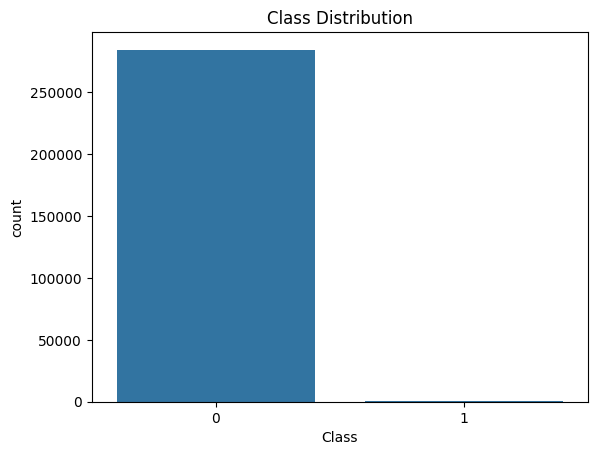

In [16]:
#EDA
print(df.describe())
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [49]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(df[df.Class==1]), len(df[df.Class==1])/len(df)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


In [18]:
# Scaling of "Time" and "Amount" columns
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [19]:
# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [22]:
# Supervised Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300)
}

In [23]:
# Train and evaluate supervised models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Logistic Regression Results:
Accuracy: 0.948542989290048
Precision: 0.9741353718272228
Recall: 0.9217345505617978
F1 Score: 0.9472107959875875
Confusion Matrix:
[[83058  2091]
 [ 6687 78753]]

XGBoost Results:
Accuracy: 0.9996951737802555
Precision: 0.9993917559537735
Recall: 1.0
F1 Score: 0.9996957854585449
Confusion Matrix:
[[85097    52]
 [    0 85440]]

MLP Results:
Accuracy: 0.9998358628047529
Precision: 0.9996723920063649
Recall: 1.0
F1 Score: 0.9998361691670372
Confusion Matrix:
[[85121    28]
 [    0 85440]]


In [24]:
# Hyperparameter Tuning for Logistic Regression
grid_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(), grid_params, scoring='f1', cv=5)
grid.fit(X_train, y_train)
print(f"Best Parameters for Logistic Regression: {grid.best_params_}")

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [32]:
# Hyperparameter Tuning for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=XGBClassifier(eval_metric='logloss'), param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters for XGBoost:", grid_search.best_params_)

Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}


In [25]:
# Unsupervised Learning Model with Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_iforest = iso_forest.fit_predict(X)
y_pred_iforest = [1 if x == -1 else 0 for x in y_pred_iforest]

print("\nIsolation Forest Results:")
print(f"Confusion Matrix:\n{confusion_matrix(y, y_pred_iforest)}")
print(f"Classification Report:\n{classification_report(y, y_pred_iforest)}")


Isolation Forest Results:
Confusion Matrix:
[[281755   2560]
 [   203    289]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.59      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807



In [35]:
# Isolation Forest for Rare Event Detection
iso_forest = IsolationForest(
    n_estimators=100,            # Number of trees in the forest
    contamination=0.001,         # Proportion of outliers
    max_samples='auto',          # Number of samples to draw for training
    random_state=42              # For reproducibility
)
iso_forest.fit(X)                # Train on the entire dataset
y_pred_iforest = iso_forest.predict(X)

# Convert predictions (-1: anomaly, 1: normal) to (1: fraud, 0: non-fraud)
y_pred_iforest = [1 if pred == -1 else 0 for pred in y_pred_iforest]

print("\nIsolation Forest Results (Rare Event Detection):")
print(f"Confusion Matrix:\n{confusion_matrix(y, y_pred_iforest)}")
print(f"Classification Report:\n{classification_report(y, y_pred_iforest)}")



Isolation Forest Results (Rare Event Detection):
Confusion Matrix:
[[284113    202]
 [   409     83]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.17      0.21       492

    accuracy                           1.00    284807
   macro avg       0.64      0.58      0.61    284807
weighted avg       1.00      1.00      1.00    284807



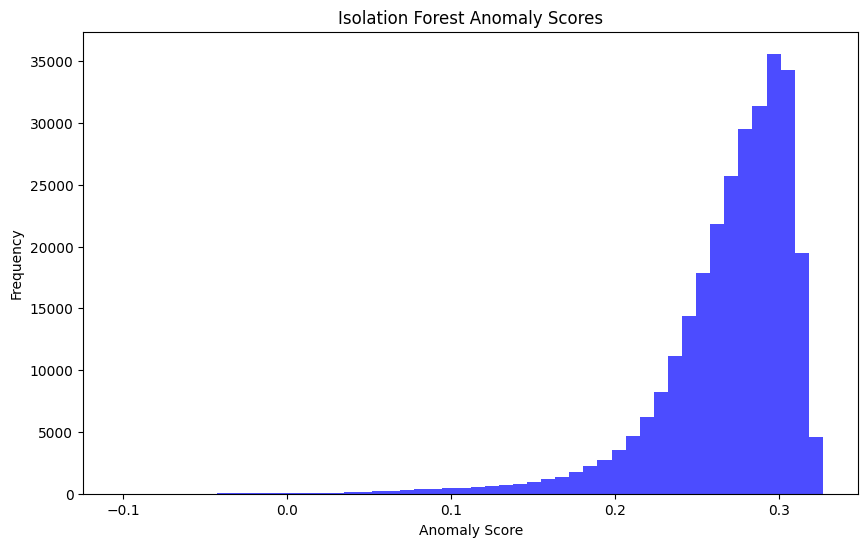

In [36]:
# Plot Anomaly Scores
anomaly_scores = iso_forest.decision_function(X)
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.7)
plt.title('Isolation Forest Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Unsupervised Learning with Autoencoder
input_dim = X.shape[1]
encoding_dim = 14  # Compression factor, adjust as needed

# Autoencoder Model
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

In [28]:
# Compile and Train the Autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, verbose=1)


Epoch 1/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1139 - val_loss: 0.8881
Epoch 2/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8850 - val_loss: 0.8389
Epoch 3/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8324 - val_loss: 0.8189
Epoch 4/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8341 - val_loss: 0.8036
Epoch 5/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8293 - val_loss: 0.7915
Epoch 6/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8092 - val_loss: 0.7845
Epoch 7/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8226 - val_loss: 0.7806
Epoch 8/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8000 - val_loss: 0.7775
Epoch 9/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8064 - val_loss: 0.7751
Epoch 10/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7987 - val_loss: 0.7741
Epoch 11/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7979 - val_loss: 0.7724
Epoch 12/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [34]:
# Reconstruction Errors
X_pred = autoencoder.predict(X)
mse = np.mean(np.power(X - X_pred, 2), axis=1)
thresh = np.percentile(mse, 99)  # Threshold for anomaly detection
y_pred_ae = [1 if e > thresh else 0 for e in mse]

print("\nAutoencoder Results:")
print(f"Confusion Matrix:\n{confusion_matrix(y, y_pred_ae)}")
print(f"Classification Report:\n{classification_report(y, y_pred_ae)}")

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step

Autoencoder Results:
Confusion Matrix:
[[281752   2563]
 [   206    286]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.58      0.17       492

    accuracy                           0.99    284807
   macro avg       0.55      0.79      0.58    284807
weighted avg       1.00      0.99      0.99    284807



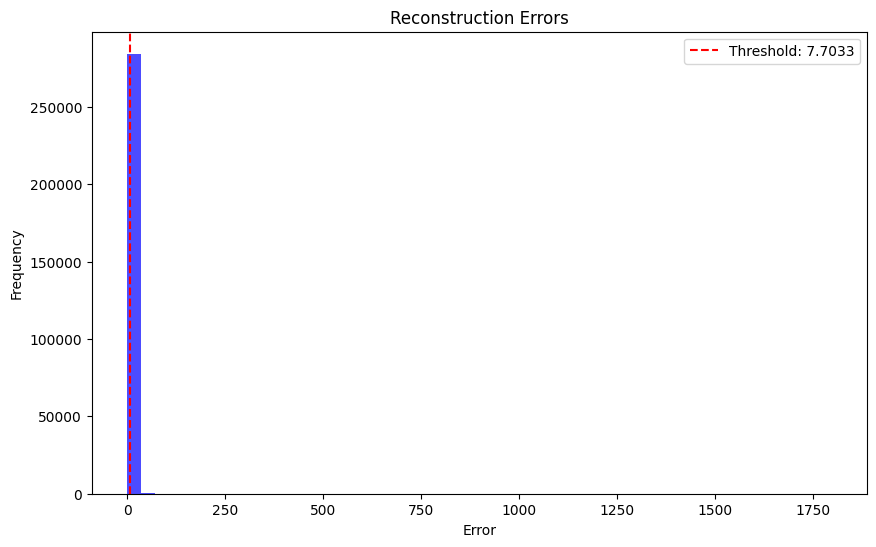

In [39]:
# Plot Reconstruction Errors
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, color='blue', alpha=0.7)
plt.axvline(x=thresh, color='red', linestyle='--', label=f'Threshold: {thresh:.4f}')
plt.title('Reconstruction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [43]:
# To plot ROC-AUC and PR-AUC
def plot_auc_curves(y_true, y_scores, model_name):
    """
    Plots ROC-AUC and PR-AUC curves.

    Parameters:
        y_true: Ground truth labels
        y_scores: Model's predicted probabilities or anomaly scores
        model_name: Name of the model for the title
    """
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall curve and AUC
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)

    # Plot ROC curve
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2) # Removed extra space before this line
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {model_name}')
    plt.legend(loc='lower left')

    plt.tight_layout()
    plt.show()


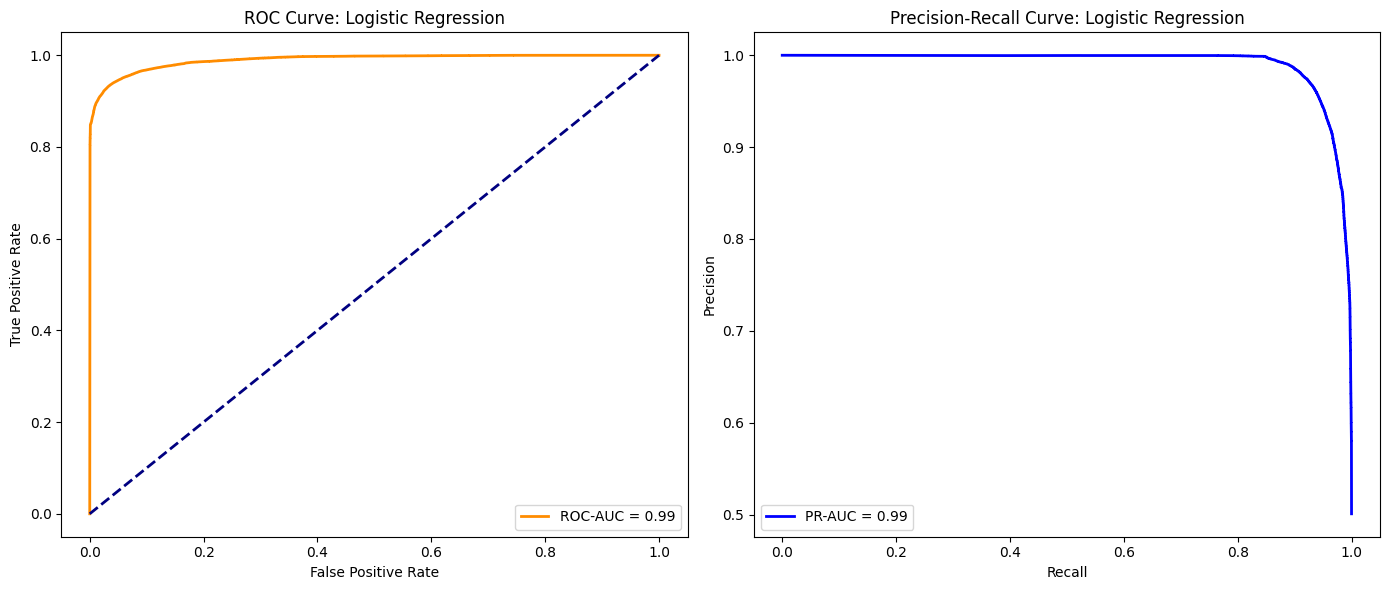

In [44]:
# Supervised Models: Logistic Regression Example
logistic_probs = models["Logistic Regression"].predict_proba(X_test)[:, 1]
plot_auc_curves(y_test, logistic_probs, "Logistic Regression")



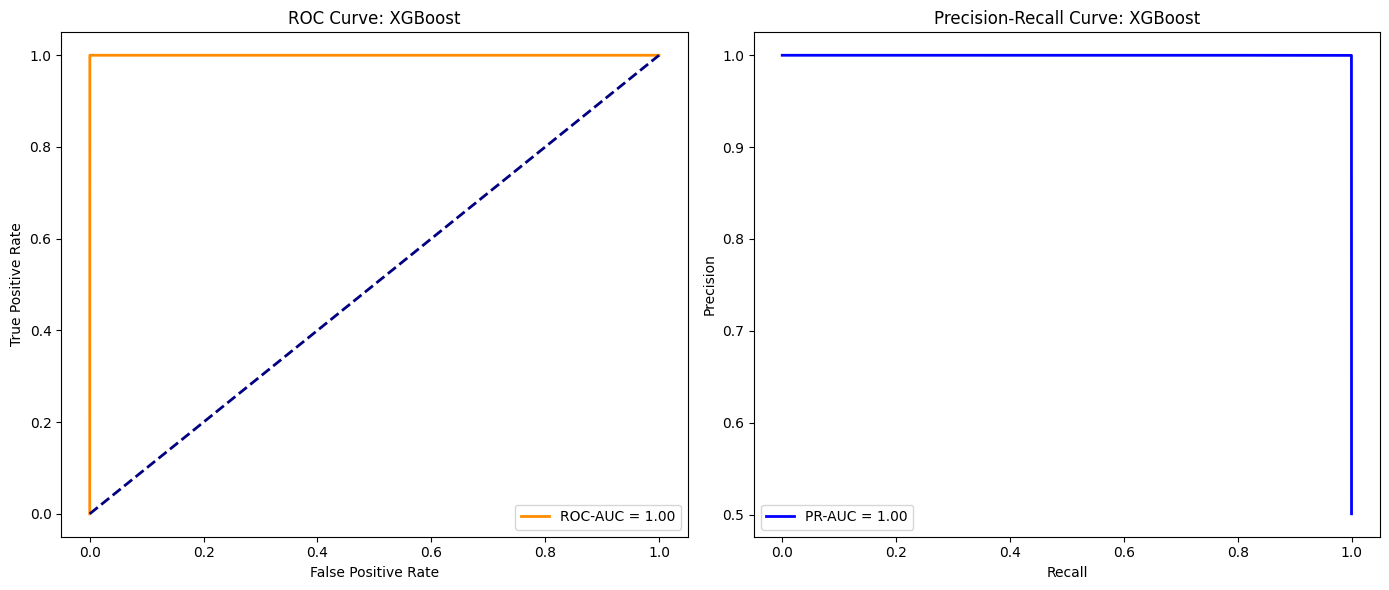

In [45]:
# Supervised Models: XGBoost Example
xgboost_probs = models["XGBoost"].predict_proba(X_test)[:, 1]
plot_auc_curves(y_test, xgboost_probs, "XGBoost")



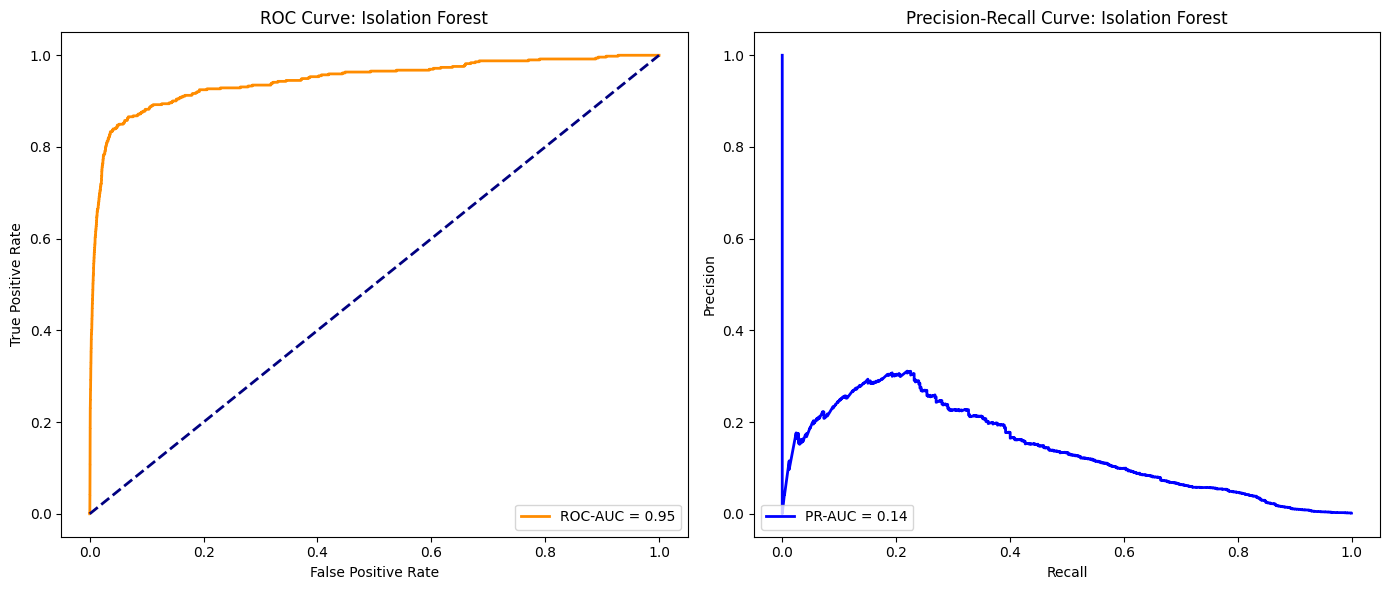

In [46]:
# Unsupervised Models: Isolation Forest
# Use anomaly scores for ROC/PR curves
iso_scores = -iso_forest.decision_function(X)  # Negative scores since higher values indicate normal
plot_auc_curves(y, iso_scores, "Isolation Forest")



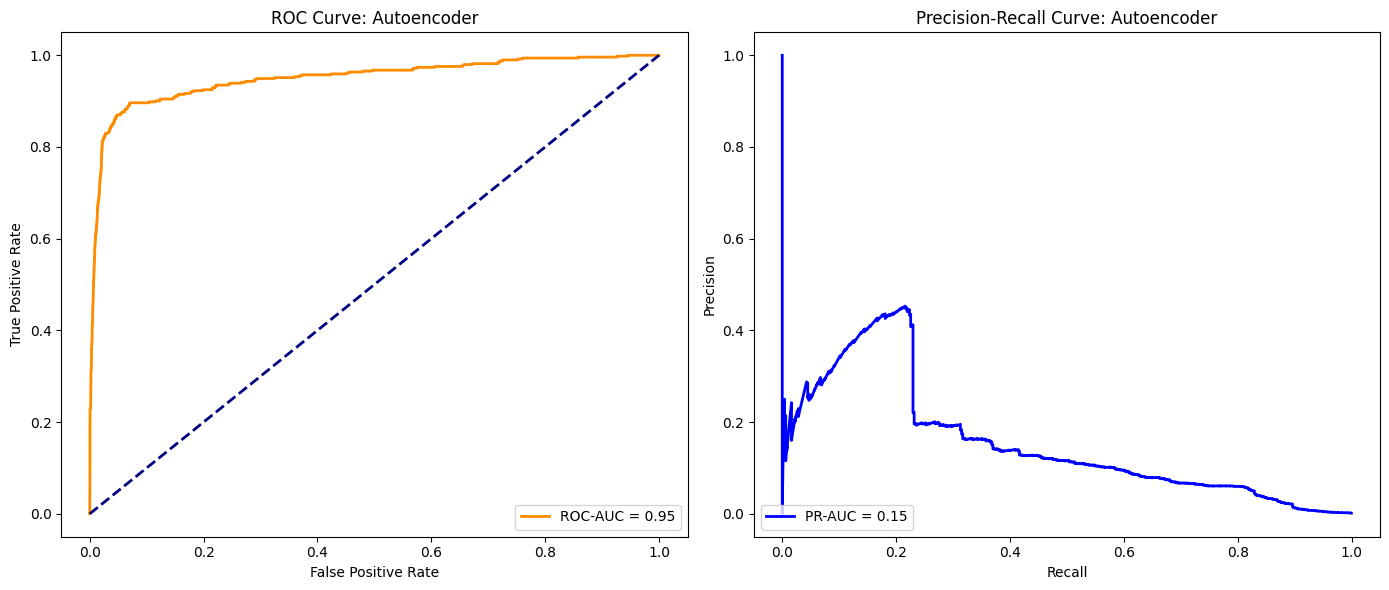

In [47]:
# Unsupervised Models: Autoencoder
# Reconstruction errors as scores for ROC/PR curves
plot_auc_curves(y, mse, "Autoencoder")

Prediction for the selected sample (fraud probability): 1.0000


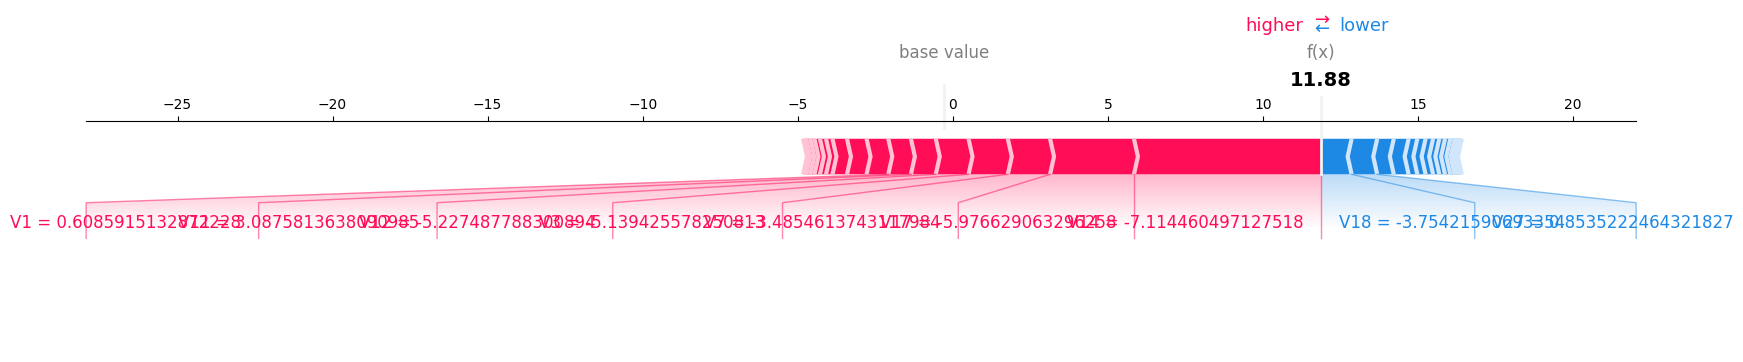

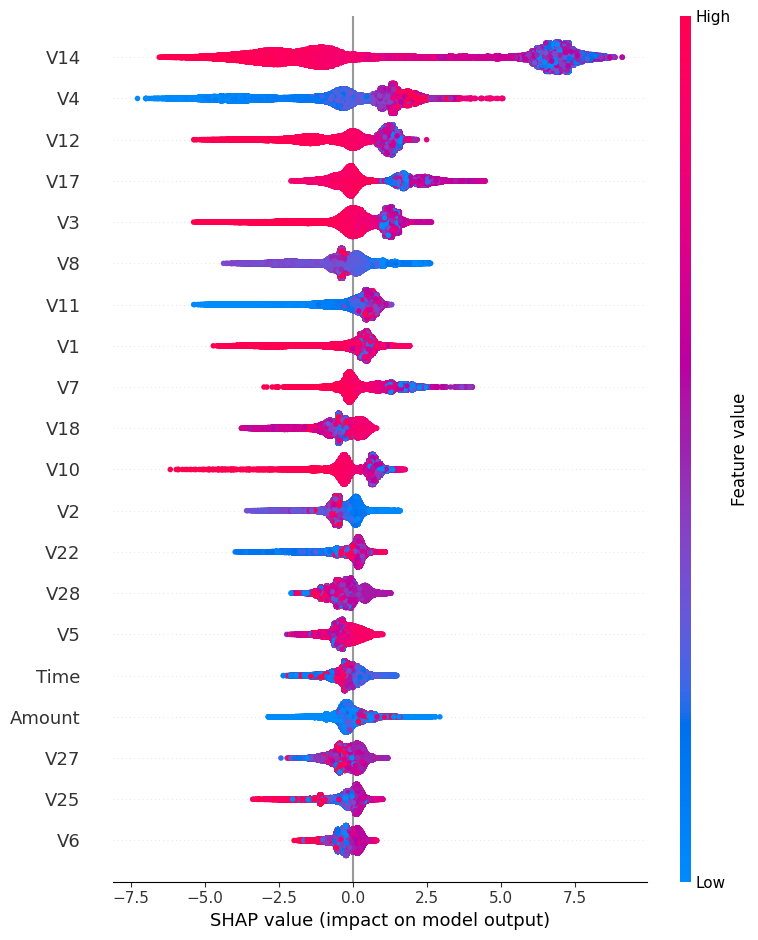

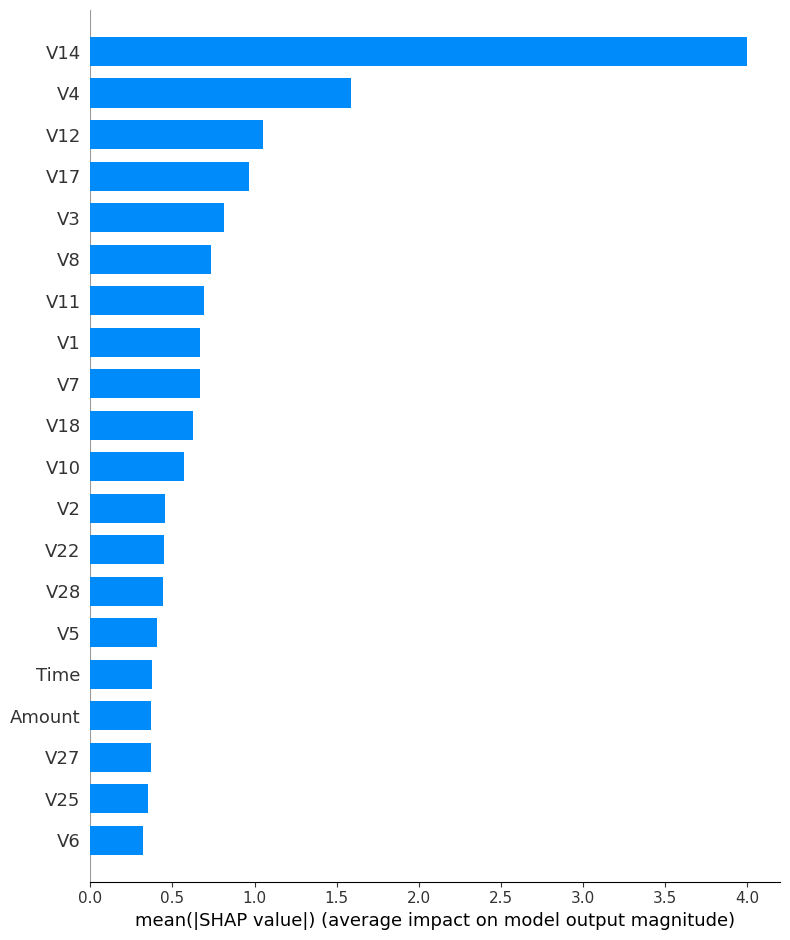

<Figure size 1000x600 with 0 Axes>

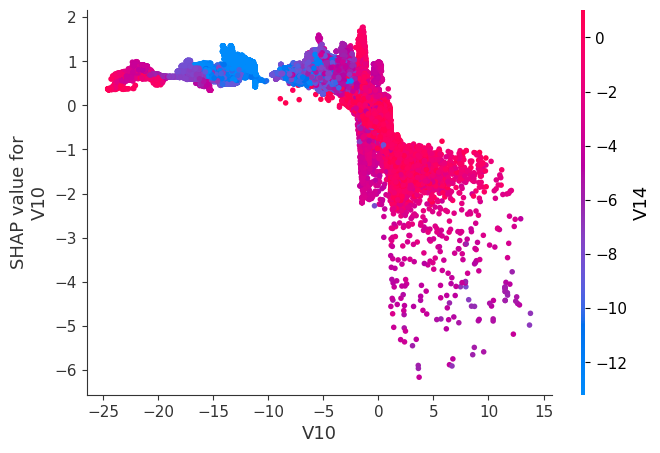

In [50]:
# Install SHAP library
!pip install shap

# Import necessary libraries
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(models["XGBoost"])  # XGBoost model
shap_values = explainer.shap_values(X_test)

# Select a sample for explanation
sample_index = 0  # Change this index to explain different samples
sample = X_test.iloc[sample_index]

# Print the sample's prediction
prediction = models["XGBoost"].predict_proba([sample])[:, 1]
print(f"Prediction for the selected sample (fraud probability): {prediction[0]:.4f}")

# Explain the selected sample
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index],
    sample,
    matplotlib=True
)

# Global Feature Importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

# Feature Importance for All Samples
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Visualize SHAP values for a single feature across the test set
plt.figure(figsize=(10, 6))
shap.dependence_plot("V10", shap_values, X_test)  # Replace "V10" with any feature name

Force Plot: Shows how each feature contributed to the model's prediction for a specific sample.Also help us understand how individual features pushed the model's prediction toward fraud (positive SHAP values) or non-fraud (negative SHAP values).

Summary Plot: Provides an overview of the most important features influencing the model's predictions globally.It also shows which features (e.g., V10, V14, Amount) are most influential in detecting fraud.

Dependence Plot: Highlights the relationship between a selected feature and its SHAP values, showing its effect on predictions.

This approach helps make the XGBoost model's predictions interpretable and trustworthy.